# Fetal Health Classification

# Names


- Belinda Yan
- Jennifer Wong
- Nick Schaefer
- Hiba Shaikh

# Abstract


Our goal is to accurately train a classifier to be able to detect fetal health problems early on in order to decrease current rates of child mortality. To accomplish this, we will be using cardiotocogram data, which are measurements taken from the fetus during pregnancy and labour like Fetal Heart Rate (FHR) and number of uterine contractions per second, among many other fetal condition measurements. With this data, we will train K Nearest Neighbors (KNN) and decision tree classifiers in order to recognize when a fetus health is normal, suspect, or pathological. We then will assess and select the best model so that we will be able to provide an accurate and reliable tool meant to aid in identifying and treating fetal health problems as early as possible. In order to quantify what our best model is, we will split our data into train and tests sets where the model will train with our training data and then be evaluated with our testing data. We then will use zero-one loss to judge the model's performance, which is the average number of errors across the test performances of each model, and then pick the one with the smallest average error.



# Background



Fetal mortality is classified as the death of a fetus prior to delivery. Although it is a very prevalent issue, it is often overlooked as the public tends to focus more on infant mortality due to lack of sufficient knowledge about what causes fetal mortality and how to prevent it. Most of the data collected on fetal deaths are of the deaths that occur at 20 weeks of gestation or more and very little data is collected about deaths prior to that time. Even with the collected data, there is a lot of variation among the completeness of the data as well as the method of reporting it. According to the Center for Disease and Control (CDC), 20,854 fetal deaths that happened at 20 weeks of gestation or more were reported in the U.S. in 2020 and the fetal mortality rate for 2020 was 5.74 deaths per 1,000 live births<a name="Gregory"></a>[<sup>[1]</sup>](#Gregorynote). Although a significant proportion of fetal deaths cannot be connected to a singular cause, many studies have shown that some factors that may contribute to fetal deaths include lack of access to assistance in labor and delivery, maternal conditions or complications, infections, and birth injuries, among many others. One solution for these problems could be increasing access to emergency obstetric care and access to skilled labor and delivery so that fetal deaths can be kept at a minimum <a name="JR"></a>[<sup>[2]</sup>](#JRnote). Minimizing fetal health is important as it pertains to population health as a whole and can ultimately aid us in addressing and solving a variety of problems related to healthcare and access to such services beginning with infant and fetal care <a name="Washington State Department of Health"></a>[<sup>[3]</sup>](#Washingtonnote).

# Problem Statement


Question: Can our model accurately predict fetus mortality 80% of the time?

Several of the United Nations' Sustainable Development Goals speak on decreasing the number of preventable deaths of newborns and children under 5 years of age. Currently, a vast majority of child and maternal mortality (94%) occur in low-resource settings in which most could have been prevented.

The use of Cardiotocograms (CTGs), a simple and cost accessible option, can help assess fetal health. In turn, healthcare professionals can take actions to prevent child and maternal mortality earlier.

Therefore the binary classification problem we are trying to solve is determining whether a fetus is healthy or not based on the different features in the dataset. Our goal is to use ML techniques and data from CTGs, in order to create models that accurately predict fetal health up to 80% of the time.




# Data


**Link to dataset:**
https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

**Dataset size:** Our dataset has 22 variables and 2126 observations.

**Description of an observation:** An observation consists of health information for a fetal. The information includes the the following:
- baseline fetal heart rate
- number of heart rate accelerations per second
- number of fetal movements per second
- number of uterine contractions per second of mother
- number of light decelerations per second
- number of severe decelerations per second
- number of prolonged decelerations per second
- percentage of time with abnormal short term variability
- mean value of short term variability
- percentage of time with abnormal long term variability
- mean value of long term variability
- width of histogram made (using all values recorded)
- histogram minimum value (using all values recorded)
- histogram maximum value (using all values recorded)
- number of peaks in exam histogram (using all values recorded)
- number of zeroes (using all values recorded)
- histogram mode (using all values recorded)
- histogram mean (using all values recorded)
- histogram median (using all values recorded)
- histogram variance (using all values recorded)
- histogram trend (using all values recorded)
- fetal health (categorized as normal, suspect, or pathological)

*Note: Decelerations are temporary but distinct decreases of fetal heart rate.*

**Critical variables:** Some critical variables are listed below. These variables will be critical in our classifcation problem.
- baseline fetal heart rate
  - represented as integers
- number of heart rate accelerations per second
  - represented as floats
- number of fetal movements per second
  - represented as floats
- number of uterine contractions per second of mother
  - represented as floats
- number of light decelerations per second
  - represented as floats
- number of severe decelerations per second
  - represented as floats
- number of prolonged decelerations per second
  - represented as floats
- percentage of time with abnormal short term variability
  - represented as floats
- mean value of short term variability
  - represented as floats
- percentage of time with abnormal long term variability
  - represented as floats
- mean value of long term variability
  - represented as floats
- fetal health
  - represented as integers 1, 2, or 3 (1 - normal, 2 - suspect, 3 - pathological)

**Transformations & Cleaning:**


Setup dataframe with data:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/COGS118A/Group025-SP23/main/fetal_health.csv')
df.head(10)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


Remove columns that have histogram calculations:

In [ ]:
df = df[df.columns.drop(list(df.filter(regex='histogram')))]
df = df.dropna()
df.head(10)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,3.0


There are no columns that have null values so there is no data to remove from the dataset

In [ ]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
fetal_health                                              0
dtype: int64

Split data into training and testing datasets:

In [ ]:
X = df.drop(columns=['fetal_health'])
Y = df['fetal_health']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# Proposed Solution



The solution to our problem of determining which features are most important in determining a fetus' health and classifying it as healthy or not is using different classification models and then determine which is the most accurate. We plan on training our model by using K Nearest Neighbors and then again with decision tree classifiers to classify between healthy and unhealthy fetuses. Decision trees and K Nearest Neighbors are both effective classifiers for our problem, and will allow us to train each of these models to accuaretly predict a fetus' health. Then we plan on using nested cross validation to determine the best model and the best parameters for that model.






# Evaluation Metrics


We plan our evaluating our model using the following methods:

* The accuracy of the model - test using zero-one loss
* Precision - proportion of correct postive instances
* Recall - true positive rate, as false negatives can be detrimental to fetal health and treatment plan
* F1 score - mean of precision and recall, gives a more balanced measure

We believe these metrics will help us evaluate our model in order to determine whether it will be accurate at predicting the fetus' health.

In order to combine all these metrics, we have decided to assign them the following weights: 0.3 for accuracy, 0.3 for recall, 0.2 for precision and 0.2 for F1 score. We chose these weights because we wanted accuracy and recall to be weighted more than precision and F1 score, since it is more important for us to increase the accuracy of our predictions and our true positive rate than anything else. Thus, we have decided to assign these with greater weights and have them all sum to 1.


# Preliminary results

###Feature Selection using Random Forest

**Features available:**

*   `baseline value`: baseline fetal heart rate
*   `accelerations`: short term rises in fetal heart rate
*   `fetal_movement`: number of fetal movements in pregnant woman
*   `uterine_contractions`: contractions of pregnant women
*   `light_decelerations`: light decelerations of fetal heart rate
*   `severe_decelerations`: severe decelerations of fetal heart rate
*   `prolongued_decelerations`: prolongued decelerations of fetal heart rate
*   `abnormal_short_term_variability`: number of abnormal short term variability
*   `mean_value_of_short_term_variability`: mean number of abnormal short term variability
*   `percentage_of_time_with_abnormal_long_term_variability`: percentage of time fetal heart rate has abnormal long term variability
*   `mean_value_of_long_term_variability`: mean number of abnormal long term variability


Random forests are not influenced by outliers and does not need scaling or transformation of variables. Random forests are also known provide high accuracy and balance the bias-variance trade-off well. This feature selection works well with datasets without high-cardinality features due to it being impurity-based, which aligns well with our dataset. Since random forests have good performance and efficient runtime in training large datasets, we decided to use it to determine the features importances.


We fitted a Random Forest Classifier on our training data and determined the feature importances corresponding to each of our features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# fits training data and gets feature importance
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_

Using the features importances, we generated a bar plot to visualize and compare each of the feature importance to another. Note the feature importances are generated using Mean Feature in Impurity (MDI).

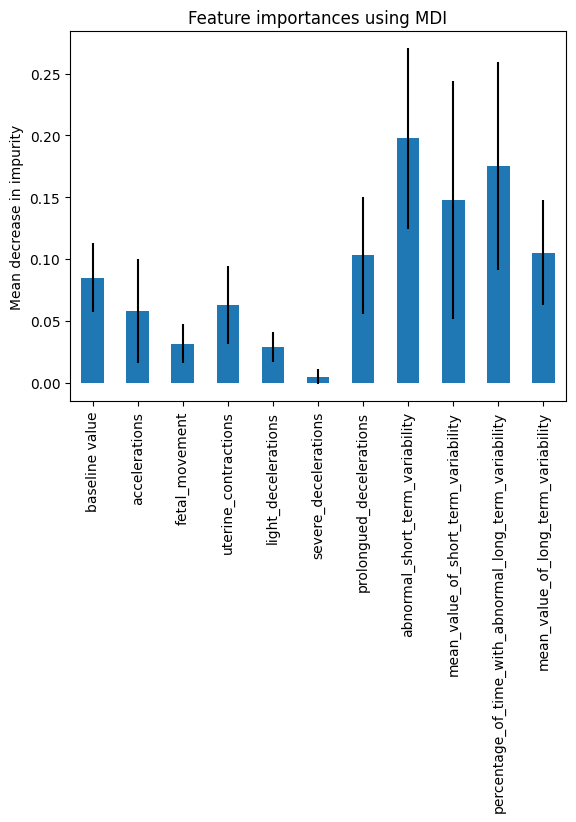

In [ ]:
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# plots features importances along with its standard deviation
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

The top 3 most importance features are `abnormal_short_term_variability`, `mean_value_of_short_term_variability`, and `percentage_of_time_with_abnormal_long_term_variability`.

### K-Nearest Neighbors

After doing feature selection, we used a K-Nearest Neighbors algorithm on our training data to generate preliminary results and test the accuracy of the algorithm on our testing data. We chose k = 20 for this training as it is just a preliminary test and the best value of k will be optimized and tested later.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating a dataset with only the top 3 most important features and their fetal health classifications
features = df[['abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'fetal_health']]
X = features.drop(columns=['fetal_health'])
Y = features['fetal_health']
# Splitting the data into training and testing sets based off of the most important features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# Features from the test and training sets are scaled with StandardScaler to ensure they are on the same scale before being passed in
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and fit the data on the K Nearest Neighbors Classifier object
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, Y_train)
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.8533834586466166


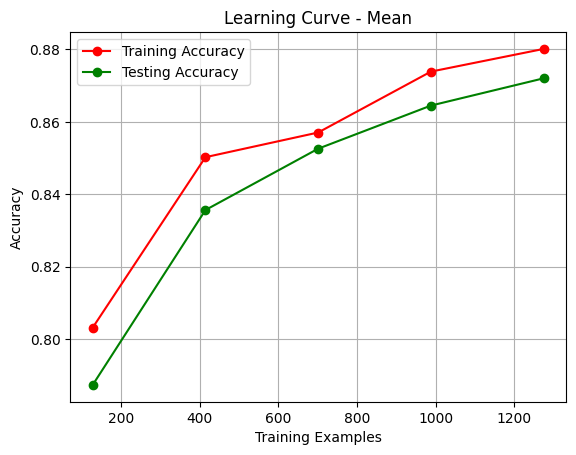

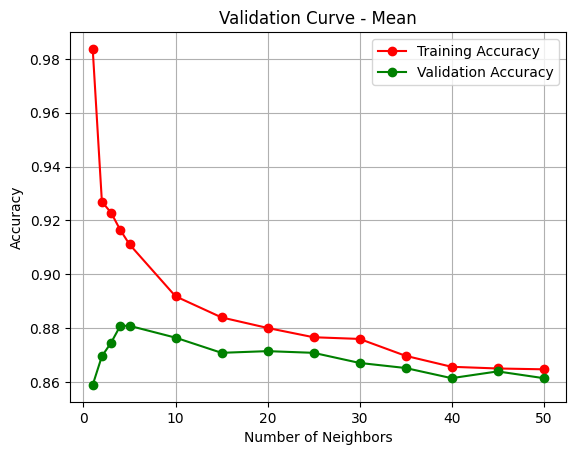

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, validation_curve

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(knn, X_train_scaled, Y_train, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve - Mean")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# Plot validation curve
param_range = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_scores, val_scores = validation_curve(knn, X_train_scaled, Y_train, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.title("Validation Curve - Mean")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(param_range, val_scores_mean, 'o-', color="g", label="Validation Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


#Results

###Preparing, transforming, and fitting the data

In [ ]:
# Define a function to binarize the "fetal-health" column into 0's (Healthy) or 1's (Non-Healthy)
def binary(num):
    if num == 1:
        return 0
    if num > 1:
        return 1
    return 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating a dataset with only the top 3 most important features and their fetal health classifications
features = df[['abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'fetal_health']]
X = features.drop(columns=['fetal_health'])
Y = features['fetal_health']
Y = Y.apply(binary)
# Splitting the data into training and testing sets based off of the most important features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# Features from the test and training sets are scaled with StandardScaler to ensure they are on the same scale before being passed in
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and fit the data on the K Nearest Neighbors Classifier object
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, Y_train)
y_pred = knn.predict(X_test_scaled)

### Pipeline Creation and Hyperparameter Selection

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, f1_score

#pipeline for each alg
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

#param grids
param_grid_dt = {
    'clf__criterion': ['gini', 'entropy'],  # Splitting criterion
    'clf__max_depth': [None, 2, 4, 6, 8, 10, 12],  # Maximum depth of the tree
}

param_grid_knn = {
    'clf__n_neighbors': np.arange(1,26).tolist(),  # Number of neighbors to consider
}

param_grid_svm = {
    'clf__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'clf__gamma': [0.1, 1, 10]  # Kernel coefficient
}

#inner loop
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt, cv=5, scoring="accuracy")
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=5, scoring="accuracy")
grid_search_svm = GridSearchCV(pipeline_svm, param_grid=param_grid_svm, cv=5, scoring="accuracy")

#outer loop
nested_scores_dt = cross_val_score(grid_search_dt, X=X_train_scaled, y=Y_train, cv=5) #put verbose =3 back in ??
nested_scores_knn = cross_val_score(grid_search_knn, X=X_train_scaled, y=Y_train, cv=5)
nested_scores_svm = cross_val_score(grid_search_svm, X=X_train_scaled, y=Y_train, cv=5)



#fit models on whole training set, use best hyperparams
grid_search_dt.fit(X_train_scaled, Y_train)
grid_search_knn.fit(X_train_scaled, Y_train)
grid_search_svm.fit(X_train_scaled, Y_train)

accuracy_dt = grid_search_dt.score(X_test_scaled, Y_test)
accuracy_knn = grid_search_knn.score(X_test_scaled, Y_test)
accuracy_svm = grid_search_svm.score(X_test_scaled, Y_test)

print("The following displays the accuracy for each model:")
print("Decision Tree Accuracy:", accuracy_dt)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)

The following displays the accuracy for each model:
Decision Tree Accuracy: 0.8834586466165414
K-Nearest Neighbors Accuracy: 0.8759398496240601
SVM Accuracy: 0.8890977443609023


In [ ]:
#gets best hyperparameters
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best hyperparameters for K-Nearest Neighbors:", grid_search_knn.best_params_)
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)

Best hyperparameters for Decision Tree: {'clf__criterion': 'gini', 'clf__max_depth': 6}
Best hyperparameters for K-Nearest Neighbors: {'clf__n_neighbors': 13}
Best hyperparameters for SVM: {'clf__C': 100, 'clf__gamma': 1}


### Measuring Performance with Chosen Evaluation Metrics

In [ ]:
#model predictions on test set
predictions_dt = grid_search_dt.predict(X_test_scaled)
predictions_knn = grid_search_knn.predict(X_test_scaled)
predictions_svm = grid_search_svm.predict(X_test_scaled)

#calculate accuracy
accuracy_dt = accuracy_score(Y_test, predictions_dt)
accuracy_knn = accuracy_score(Y_test, predictions_knn)
accuracy_svm = accuracy_score(Y_test, predictions_svm)

print("Decision Tree Accuracy:", accuracy_dt)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)
print("")

#calculate recall
recall_dt = recall_score(Y_test, predictions_dt)
recall_knn = recall_score(Y_test, predictions_knn)
recall_svm = recall_score(Y_test, predictions_svm)

print("Decision Tree Recall:", recall_dt)
print("K-Nearest Neighbors Recall:", recall_knn)
print("SVM Recall:", recall_svm)
print("")

#calculate precision
precision_dt = precision_score(Y_test, predictions_dt)
precision_knn = precision_score(Y_test, predictions_knn)
precision_svm = precision_score(Y_test, predictions_svm)

print("Decision Tree Precision:", precision_dt)
print("K-Nearest Neighbors Precision:", precision_knn)
print("SVM Precision:", precision_svm)
print("")

#calculate F1 score
f1_dt = f1_score(Y_test, predictions_dt)
f1_knn = f1_score(Y_test, predictions_knn)
f1_svm = f1_score(Y_test, predictions_svm)

print("Decision Tree F1 Score:", f1_dt)
print("K-Nearest Neighbors F1 Score:", f1_knn)
print("SVM F1 Score:", f1_svm)

Decision Tree Accuracy: 0.8834586466165414
K-Nearest Neighbors Accuracy: 0.8759398496240601
SVM Accuracy: 0.8890977443609023

Decision Tree Recall: 0.6528925619834711
K-Nearest Neighbors Recall: 0.6611570247933884
SVM Recall: 0.6611570247933884

Decision Tree Precision: 0.797979797979798
K-Nearest Neighbors Precision: 0.7619047619047619
SVM Precision: 0.8163265306122449

Decision Tree F1 Score: 0.7181818181818181
K-Nearest Neighbors F1 Score: 0.7079646017699116
SVM F1 Score: 0.7305936073059361


In [ ]:
from sklearn.metrics import classification_report

#model predictions
predictions_dt = grid_search_dt.predict(X_test_scaled)
predictions_knn = grid_search_knn.predict(X_test_scaled)
predictions_svm = grid_search_svm.predict(X_test_scaled)

#get precision, recall, and F1 score reports
report_dt = classification_report(Y_test, predictions_dt, digits=4)
report_knn = classification_report(Y_test, predictions_knn, digits=4)
report_svm = classification_report(Y_test, predictions_svm, digits=4)

#print reports
print("Decision Tree Classification Report:")
print(report_dt)
print()

print("K-Nearest Neighbors Classification Report:")
print(report_knn)
print()

print("SVM Classification Report:")
print(report_svm)
print()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0     0.9030    0.9513    0.9265       411
           1     0.7980    0.6529    0.7182       121

    accuracy                         0.8835       532
   macro avg     0.8505    0.8021    0.8224       532
weighted avg     0.8791    0.8835    0.8792       532


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0     0.9040    0.9392    0.9212       411
           1     0.7619    0.6612    0.7080       121

    accuracy                         0.8759       532
   macro avg     0.8329    0.8002    0.8146       532
weighted avg     0.8717    0.8759    0.8727       532


SVM Classification Report:
              precision    recall  f1-score   support

           0     0.9055    0.9562    0.9302       411
           1     0.8163    0.6612    0.7306       121

    accuracy                         0.8891       532
   macro avg     0.

In [ ]:
dt_scores = np.array([accuracy_dt,recall_dt,precision_dt,f1_dt])
dt_scores

array([0.88345865, 0.65289256, 0.7979798 , 0.71818182])

In [ ]:
knn_scores = np.array([accuracy_knn,recall_knn,precision_knn,f1_knn])
knn_scores

array([0.87593985, 0.66115702, 0.76190476, 0.7079646 ])

In [ ]:
svm_scores = np.array([accuracy_svm,recall_svm,precision_svm,f1_svm])
svm_scores

array([0.88909774, 0.66115702, 0.81632653, 0.73059361])

In [ ]:
# Weighing them according to the weights we have assigned to each evaluation metric
eval_weights = np.array([.3,.3,.2,.2])
eval_weights

array([0.3, 0.3, 0.2, 0.2])

In [ ]:
dt_weighted = dt_scores * eval_weights
knn_weighted = knn_scores * eval_weights
svm_weighted = svm_scores * eval_weights

print(dt_weighted)

[0.26503759 0.19586777 0.15959596 0.14363636]


In [ ]:
print(sum(dt_weighted))
print(sum(knn_weighted))
print(sum(svm_weighted))
print("The final model with the best performance according to our evaluation metric is the Decision Tree Model")

0.764137685812327
0.7551029350601692
0.7744604583299234
The final model with the best performance according to our evaluation metric is the Decision Tree Model


###Training the Final Model and Measuring/Plotting Performance




In [67]:

model = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
model.fit(X_train,Y_train)

predicted = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted, Y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8834586466165414


[Text(0.4647177419354839, 0.9285714285714286, 'x[0] <= 59.5\ngini = 0.343\nsamples = 1594\nvalue = [1244, 350]'),
 Text(0.20161290322580644, 0.7857142857142857, 'x[2] <= 60.5\ngini = 0.125\nsamples = 1130\nvalue = [1054, 76]'),
 Text(0.18548387096774194, 0.6428571428571429, 'x[2] <= 7.5\ngini = 0.117\nsamples = 1124\nvalue = [1054, 70]'),
 Text(0.10483870967741936, 0.5, 'x[1] <= 5.6\ngini = 0.077\nsamples = 898\nvalue = [862, 36]'),
 Text(0.06451612903225806, 0.35714285714285715, 'x[1] <= 0.75\ngini = 0.073\nsamples = 893\nvalue = [859, 34]'),
 Text(0.03225806451612903, 0.21428571428571427, 'x[0] <= 46.0\ngini = 0.185\nsamples = 87\nvalue = [78, 9]'),
 Text(0.016129032258064516, 0.07142857142857142, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.04838709677419355, 0.07142857142857142, 'gini = 0.158\nsamples = 81\nvalue = [74, 7]'),
 Text(0.0967741935483871, 0.21428571428571427, 'x[1] <= 1.95\ngini = 0.06\nsamples = 806\nvalue = [781, 25]'),
 Text(0.08064516129032258, 0.071428571

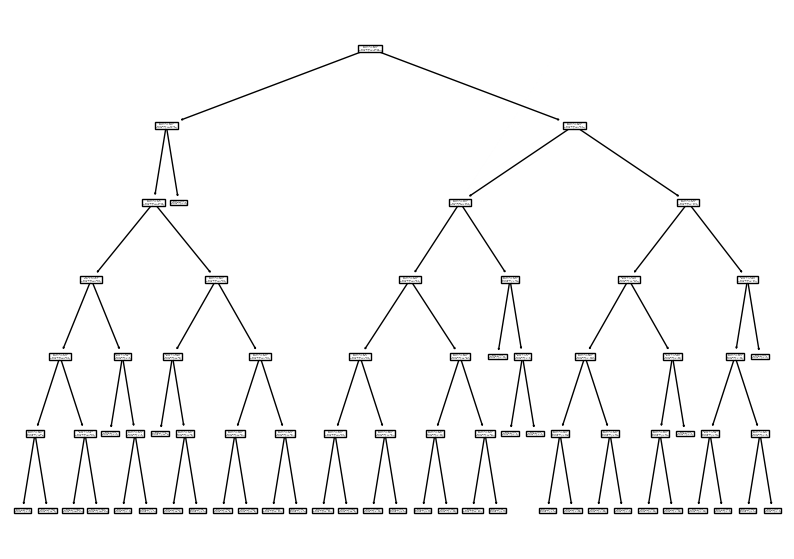

In [68]:
# Visualizing the decision tree splits
from sklearn import tree
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model)

Accuracy: 0.8740601503759399


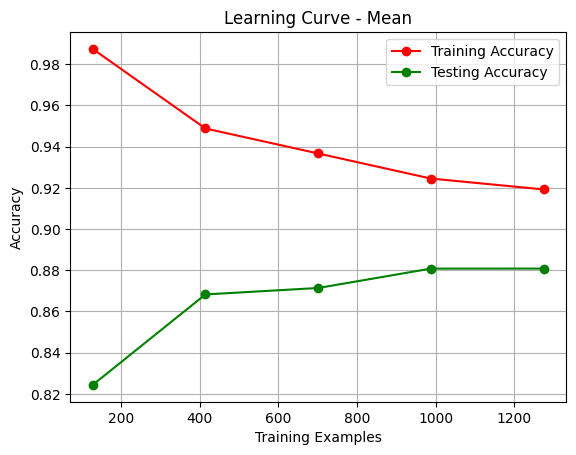

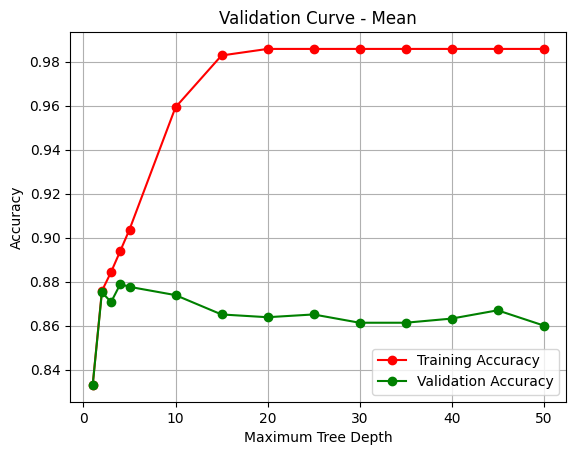

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, validation_curve

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve - Mean")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# Plot validation curve
param_range = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_scores, val_scores = validation_curve(model, X_train, Y_train, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.title("Validation Curve - Mean")
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Accuracy")
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(param_range, val_scores_mean, 'o-', color="g", label="Validation Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Discussion


### Interpreting the Result
We have found a model that indeed surpasses our benchmark of achieving an 80% accuracy on classifying whether or not a fetus is healthy or not. This was only possible by testing many different combinations of hyperparameters and models, and running them against the data and comparing them. As seen above, each model has a different accuracy, precision, recall, and F1 score, and it was impossible to know how each model would perform without testing each of them in conjunction with each other. In the preliminary results, we only tested one algorithm: K-Nearest Neighbors but we saw in the final model that it was not K-Nearest Neighbors that ended up performing the best but the Decision Tree Model. As each algorithm and model have a different way of segmenting and classifying the data, we couldn't assume that they would all classify the same data points the same way, and so our usage of grid search and cross validation allowed us to optimize the hyperparameters for our model and achieve well over above what we had originally set as an accuracy level for our final model, displaying the importance of running different models tuned to different hyperparameters.

### Limitations
In our dataset, we are given approximately 10 features with around 2000 observations. If given more data that is more representative of the population,
we could probably generate a model that could accurately predict fetal health. If given more time, we would explore more classifiers that we could use beyonds
the ones we learned in class and challenge ourselves to explore different hyperparameters that could possibily help us improve our accuracy.

### Ethics & Privacy


Some ethics and privacy issues we must consider when working on this topic include:
- The data is collected with informed consent from the pregnant individuals as well as healthcare providers. We addressed this by checking the source of our data, which was Kaggle, to confirm that the data was obtained ethically.
- Confidentiality of the individuals must be maintained. We addressed this by ensuring that all patient identification such as names, addresses, etc. are wiped from the data.
- Bias and Fairness must be considered for the collection and use of data, especially related to demographic bias. We can ensure this by studying the collection methods of the data and ensuring that it was not biased towards any one area/race/etc.
- Benefit and Risk Assessment: we must consider the potential postive effect on fetal health, but also need to evaluate the risks of things like misclassification. We addressed this by considering things like recall and accuracy in our final model to make sure that our final model minimized the rate of misclassification/false positive.




### Conclusion
We have successfully found a model that has achieved above an 80% accuracy, which was the problem statement for this project. This turned out to be the Decision Tree Classifier, with the hyper parameters: criterion = Gini and the max depth = 6,  which achieved an accuracy of approximately 0.8834. Beyond this project, this model can be trained on other types of health issues such as Alzheimer’s, diabetes, and cancer among many other things and leveraged as a tool that doctors can use to aid them in classifying health issues and addressing them earlier to increase the chances of the patient recovering from them. This project has also opened up the potential for more AI and models to be implemented in the medical field so that not only will the models be exposed and be trained on larger and more datasets than just sample data, but with the introduction of more models in the field, we will be able to use many different models for many different classification problems, and compare them with each other to ensure that we are truly obtaining the best model for the given problemm, thereby maximizing machine learning's contribution and helpfulness for doctors, patients, and society.

# Footnotes
<a name="Gregory"></a>1.[^](#Gregorynote): Gregory, C.W. Elizabeth. (4 Aug 2022). Fetal Mortality: United States, 2020. *CDC*. https://www.cdc.gov/nchs/data/nvsr/nvsr71/nvsr71-04.pdf<br>
<a name="JR"></a>2.[^](#JRnote): JR Bale. (2003). Improving Birth Outcomes: Meeting the Challenge in the Developing World. *National Library of Medicine*. https://www.ncbi.nlm.nih.gov/books/NBK222084/<br>

<a name="Washington State Department of Health"></a>3.[^](#Washingtonnote): Washington State Department of Health. Fetal and Infant Death Data. *Washington State Department of Health*. https://doh.wa.gov/data-and-statistical-reports/washington-tracking-network-wtn/fetal-and-infant-death-data <br>